In [5]:
# Если в файле excel значения через ","
import pandas as pd

data = pd.read_csv("317.csv", decimal=',', engine='python')
a = data['int']
d = []
for i in range(0, len(a)):
    c = a[i].replace(',', '.')
    d.append(c)
data["int"] = [float(x) for x in d]
data["int"]

0       70.6083
1       70.8788
2       71.7746
3       71.7041
4       72.1066
         ...   
1195    59.9185
1196    59.9129
1197    59.9077
1198    59.9071
1199    59.9362
Name: int, Length: 1200, dtype: float64

In [1]:
# Если в файле excel значения через "."
import pandas as pd
import numpy as np

data = pd.read_csv("317.csv", sep = ", ", header = None, engine='python')
data["int"] = data[0]
data["int"]

0           int
1       70,6083
2       70,8788
3       71,7746
4       71,7041
         ...   
1196    59,9185
1197    59,9129
1198    59,9077
1199    59,9071
1200    59,9362
Name: int, Length: 1201, dtype: object

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("2.csv", sep = ", ", engine='python')
data["int"] 


0       24.41252
1       24.98272
2       25.41565
3       25.71256
4       25.80632
          ...   
1195    35.23542
1196    35.25177
1197    35.15033
1198    35.12484
1199    35.12855
Name: int, Length: 1200, dtype: float64

In [ ]:
# Если в файле excel значения через "."
import pandas as pd
import numpy as np

data = pd.read_csv("317.csv", sep = ", ", header = None, engine='python')
data["int"] = data[0]
data["int"]

0.8004500328569338
0.4273322892276141
0.2957034616235914
0.23021074221192284
0.8004500328569338 0.4273322892276141 0.2957034616235914 0.23021074221192284
4
23


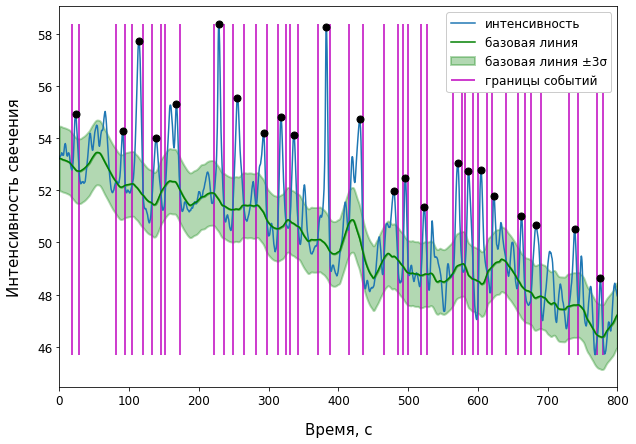

800.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def building_baseline(intensity, window): 
    sdd = []
    sd, counter, iterations = 1, 0, 7
    while counter != iterations and sd > 0.27: 
        if counter == 0:
            intensity_copy, base_line, base_lines = intensity.copy(), intensity.copy(), []
        else:
            line = []
            for i in range(0, len(intensity)):
                if intensity[i] <= base_line[i]:
                    line.append(intensity[i])
                else:
                    line.append(base_line[i])
            intensity, intensity_copy, base_line = line.copy(), line, line.copy()

        for k in range(int(window / 2)):
            intensity_copy.insert(k, intensity[0]) 
            
        for n in range(int(window / 2)):
            intensity_copy.append(intensity[-1]) 
        
        L = int(window/2)
        base_line = []
        for i in range(L, len(intensity_copy)-L):
            if (i + L + 1) >= int(window / 2):
                a = intensity_copy[i-L:i+L+1]
                c = sum(intensity_copy[i-L:i+L+1])/ window
                base_line.append(c)
        base_lines.append(base_line)  

        difference = np.array(base_line) - np.array(intensity)
        difference_mod = [0 if x < 0 else x for x in difference]
        sd = ((1 / (len(intensity) - 1)) * sum([i**2 for i in difference_mod]))**0.5
        print(sd)
        sdd.append(sd)
        counter  += 1
    print(*sdd)
    print(len(sdd))
    if sdd[-1] <= 0.27 and len(sdd) != 1:
        return base_lines[:-1]
    else:
        return base_lines
    

    
def plotting_base_lines(intensity, length, base_lines):
    fig, ax = plt.subplots(figsize =(10, 7))
    n = np.arange(0, int(length/2), 0.5)
    ax.plot(n, intensity, label = "intensity") 
    
    for bas in range(0, len(base_lines)):
        ax.plot(n, base_lines[bas], c = "g", alpha = (0.6 + (bas / 20)), label = "base_lines")
        ax.plot(n, base_lines[bas], c = "g", alpha = (0.6 + (bas / 20)))
    ax.set_ylabel("Интенсивность свечения", fontsize = 13)
    ax.set_xlabel("Время, с", fontsize = 13)
    plt.xlim(-0.001, 600)
    ax.legend()
    plt.show()
    
    
def plotting_base_line(intensity, length, base_lines):
    fig, ax = plt.subplots(figsize =(10, 7))
    n = np.arange(0, int(length/2), 0.5)
    ax.plot(n, intensity, c = "b", label = "intensity") 
    ax.plot(n, base_lines[-1], c = "g", label = "base_line")
    ax.set_ylabel("Интенсивность свечения", fontsize = 13)
    ax.set_xlabel("Время, с", fontsize = 13)
    plt.xlim(-0.001, 1200)
    ax.legend()
    plt.show()

def event_borders(intensity, base_lines):
    borders_y, borders_x, borders_xx, base_line = [],[],[], base_lines[-1]
    for i in range(0, len(intensity)-1): 
        if (intensity[i] <= base_line[i] and intensity[i+1] >= base_line[i+1]):
            borders_y.append(base_line[i])
            borders_x.append(i)
            borders_xx.append(i * (1/3))
        if  (intensity[i] >= base_line[i] and intensity[i+1] <= base_line[i+1]):
            borders_y.append(base_line[i])
            borders_x.append(i)
            borders_xx.append(i * (1/3))
    return borders_y, borders_x, borders_xx

def absolute_value(intensity, borders_x, borders_y, borders_xx, base):
    absolute_value  = []
    maximum_value = []
    index_maximum = []
    event_borders_new = []
    if (borders_x[0] == 0 and intensity[borders_x[0]] <= borders_y[0]) or (intensity[borders_x[0]-1] <= borders_y[0]):
        begin = 0
    else: 
        begin = 1
    for i in range(begin, len(borders_x)-1, 2):
        maximum = max(intensity[borders_x[i]:borders_x[i+1]])
        minimum = base[intensity.index(maximum)]
        absolut = maximum-minimum
        if absolut >= 2.06:
            absolute_value.append(absolut)
            maximum_value.append(maximum)
            index_maximum.append(intensity.index(maximum) * (1/3))
            
            event_borders_new.append(borders_xx[i])
            event_borders_new.append(borders_xx[i+1])
    print(len(absolute_value))     
    return maximum_value, absolute_value, index_maximum, event_borders_new

def absolute(intensity, borders_x, borders_y, borders_xx, base): 
    absolute_value  = []
    maximum_value = []
    index_maximum = []
    event_borders_new = []
    if (borders_x[0] == 0 and intensity[borders_x[0]] <= borders_y[0]) or (intensity[borders_x[0]-1] <= borders_y[0]):
        begin = 0
    else: 
        begin = 1
    for i in range(begin, len(borders_x)-1, 2):
        maximum = max(intensity[borders_x[i]:borders_x[i+1]])
        minimum = base[intensity.index(maximum)]
        absolut = maximum-minimum
        absolute_value.append(absolut)
        maximum_value.append(maximum)
        index_maximum.append(intensity.index(maximum) * (1/3))
            
        event_borders_new.append(borders_xx[i])
        event_borders_new.append(borders_xx[i+1])
            
    return maximum_value, absolute_value, index_maximum, event_borders_new



def plotting_borders(intensity, length, base_lines, event_borders_new, maximum_value, index_maximum):
    fig, ax = plt.subplots(figsize =(10, 7))
    n = np.arange(0, int(length/3), 0.333333)
    n = n[:-1]
    ax.plot(n, intensity, label = "интенсивность") 
    ax.plot(n, base_lines[-1], c = "g", label = "базовая линия")
    up = [(x + 1.24) for x in  base_lines[-1]]
    down = [(x - 1.24) for x in  base_lines[-1]]
    ax.fill_between(n, base_lines[-1], up, facecolor='green',alpha = 0.3,color = 'green', linewidth = 2, label = "базовая линия ±3σ")   
    ax.fill_between(n, base_lines[-1], down, facecolor='green',alpha = 0.3,color = 'green', linewidth = 2) 
    ax.vlines(event_borders_new[0], min(intensity), max(intensity), color = 'm', label = "границы событий")
    for i in range(1, len(event_borders_new)):
        ax.vlines(event_borders_new[i], min(intensity), max(intensity), color = 'm')
    for i in range(0, len(maximum_value)):
        ax.plot([index_maximum[i]], [maximum_value[i]], "ko", ms = 7)

    ax.set_ylabel("Интенсивность свечения", fontsize = 15, labelpad = 15)
    ax.set_xlabel("Время, с", fontsize = 15, labelpad = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlim(-0.001, len(intensity)/3)
    ax.legend(fontsize = 12, facecolor = "white", framealpha = 1)
    plt.show()
    
intensity = list(data["int"])
window = 85


base_lines = building_baseline(intensity, window)     
#plotting_base_lines(intensity, len(data), base_lines)
borders_y, borders_x, borders_xx = event_borders(intensity, base_lines)

maximum_value, absolute_value, index_maximum, event_borders_new = absolute_value(intensity, borders_x, borders_y, borders_xx,  base_lines[-1])

plotting_borders(intensity, len(data), base_lines, event_borders_new, maximum_value, index_maximum)

#print(*absolute_value)
#print(*event_borders_new, sep ="\n")
#print(borders_x)
#print(borders_xx)
#print(*event_borders_new)
print(len(intensity)/3)